Extracts Data from the Precriber Summary Information and Detailed Data of the Medicare Part D dataset.

In [1]:
import pandas as pd
import requests
import numpy as np

In [2]:
pd.set_option("display.max_columns", 150) #increase column options

In [3]:
md_base_url = "https://data.cms.gov/resource/" #Base URL to access Databases

Manipulation of Detailed Data (Database 1) 
Years: 2017

In [4]:
url_ID = "77gb-8z53"
dd_url = md_base_url + url_ID
print(dd_url)

https://data.cms.gov/resource/77gb-8z53


In [5]:
dd_provider = requests.get(dd_url, params={"$select":"nppes_provider_state,count(nppes_provider_state)", "$group": "nppes_provider_state"})
dd_provider_df = pd.read_json(dd_provider.content)
dd_provider_df[dd_provider_df.count_nppes_provider_state < 50000]
#retrieves the data based on providers per region

,count_nppes_provider_state,nppes_provider_state
0,6,AS
1,40,AA
2,222,XX
3,565,AE
4,1417,ZZ
5,319,AP
6,278,MP
7,1762,GU
8,37925,WY
9,3373,VI


In [6]:
dd_requests = requests.get(dd_url, params={"$where": "nppes_provider_state='DC'", "$limit": 50000})
#calls data of a specific state 

In [7]:
dd_requests.headers

{'Server': 'nginx', 'Date': 'Thu, 11 Jul 2019 18:49:18 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Socrata-RequestId': '4kci295q00yixpyrjh7roi3hf', 'Access-Control-Allow-Origin': '*', 'ETag': '"a59894aa67eab310d94159a04b9b406a--gzip"', 'Last-Modified': 'Wed, 01 May 2019 16:24:35 UTC', 'X-SODA2-Warning': 'X-SODA2-Fields, X-SODA2-Types, and X-SODA2-Legacy-Types are deprecated', 'X-SODA2-Fields': '["drug_name","total_day_supply","ge65_suppress_flag","npi","nppes_provider_first_name","total_claim_count_ge65","generic_name","total_30_day_fill_count_ge65","specialty_desc","total_day_supply_ge65","bene_count_ge65_suppress_flag","total_claim_count","nppes_provider_city","total_30_day_fill_count","bene_count_ge65","nppes_provider_state","nppes_provider_last_org_name","total_drug_cost","description_flag","total_drug_cost_ge65","bene_count"]', 'X-SODA2-Types': '["text","number","text","text","text","number","text","number

In [8]:
dd_df = pd.read_json(dd_requests.content)
dd_df = dd_df.sort_values(by=["npi","specialty_desc","drug_name"]) #read json & sort
dd_df.head(10)


,bene_count,bene_count_ge65,bene_count_ge65_suppress_flag,description_flag,drug_name,ge65_suppress_flag,generic_name,npi,nppes_provider_city,nppes_provider_first_name,nppes_provider_last_org_name,nppes_provider_state,specialty_desc,total_30_day_fill_count,total_30_day_fill_count_ge65,total_claim_count,total_claim_count_ge65,total_day_supply,total_day_supply_ge65,total_drug_cost,total_drug_cost_ge65
42422,NaN,NaN,#,S,ADVAIR DISKUS,#,FLUTICASONE/SALMETEROL,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,15.0,NaN,15,NaN,450,NaN,4692.26,NaN
18892,NaN,NaN,*,S,ALENDRONATE SODIUM,*,ALENDRONATE SODIUM,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,17.1,NaN,17,NaN,502,NaN,203.92,NaN
8223,NaN,NaN,*,S,ALLOPURINOL,NaN,ALLOPURINOL,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,22.0,22.0,22,22.0,660,660.0,158.63,158.63
25251,24.0,NaN,#,S,AMLODIPINE BESYLATE,NaN,AMLODIPINE BESYLATE,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,142.5,82.0,138,78.0,4275,2460.0,617.11,351.15
36992,NaN,NaN,*,S,AMMONIUM LACTATE,*,AMMONIUM LACTATE,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,14.0,NaN,14,NaN,384,NaN,419.47,NaN
20072,11.0,NaN,*,S,AMOXICILLIN-CLAVULANATE POTASS,*,AMOXICILLIN/POTASSIUM CLAV,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,12.0,NaN,12,NaN,111,NaN,144.49,NaN
2264,NaN,NaN,#,S,ATENOLOL,#,ATENOLOL,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,32.0,NaN,32,NaN,960,NaN,233.06,NaN
31241,NaN,NaN,*,S,ATORVASTATIN CALCIUM,NaN,ATORVASTATIN CALCIUM,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,62.3,22.0,60,20.0,1868,660.0,573.17,150.57
31435,11.0,NaN,*,S,AZITHROMYCIN,*,AZITHROMYCIN,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,12.0,NaN,12,NaN,57,NaN,70.76,NaN
18940,NaN,NaN,#,S,CARVEDILOL,#,CARVEDILOL,1003005661,WASHINGTON,ADEFOLAJU,OKETOKUN,DC,General Practice,21.2,NaN,20,NaN,620,NaN,111.12,NaN


In [9]:
npi_drug_cross_df = pd.crosstab(dd_df["npi"], dd_df["drug_name"] , values=dd_df["total_claim_count"], 
                                  aggfunc=np.sum) #uses drug_name which is the brand names
npi_drug_cross_df = npi_drug_cross_df.fillna(0)
#npi_drug_cross_df.head(10)

In [10]:
npi_drugcost_cross_df = pd.crosstab(dd_df["npi"], dd_df["drug_name"] , values=dd_df["total_drug_cost"], 
                                  aggfunc=np.sum)
npi_drugcost_cross_df = npi_drugcost_cross_df.fillna(0)
npi_drugcost_cross_df.head(10)

drug_name,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABILIFY MAINTENA,ACAMPROSATE CALCIUM,ACARBOSE,ACCUPRIL,ACEBUTOLOL HCL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACTEMRA,ACYCLOVIR,ADACEL TDAP,ADAPALENE,ADCIRCA,ADDERALL,ADDERALL XR,ADEFOVIR DIPIVOXIL,ADEMPAS,ADVAIR DISKUS,ADVAIR HFA,AGGRENOX,ALBUTEROL SULFATE,ALCLOMETASONE DIPROPIONATE,ALCOHOL PADS,ALCOHOL PREP PADS,ALENDRONATE SODIUM,ALFUZOSIN HCL ER,ALLOPURINOL,ALOSETRON HCL,ALPHAGAN P,ALPRAZOLAM,ALPRAZOLAM ER,ALTAVERA,AMANTADINE,AMBIEN CR,AMIKACIN SULFATE,AMILORIDE HCL,AMIODARONE HCL,AMITIZA,AMITRIPTYLINE HCL,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE-ATORVASTATIN,AMLODIPINE-OLMESARTAN,AMLODIPINE-VALSARTAN,AMLODIPINE-VALSARTAN-HCTZ,AMMONIUM LACTATE,AMOXAPINE,AMOXICILLIN,AMOXICILLIN-CLAVULANATE POTASS,AMPICILLIN TRIHYDRATE,AMPYRA,ANAGRELIDE HCL,ANASTROZOLE,ANDROGEL,ANORO ELLIPTA,APRISO,APTIOM,ARANESP,ARIPIPRAZOLE,ARISTADA,ARMODAFINIL,ARMOUR THYROID,ARNUITY ELLIPTA,ASCOMP WITH CODEINE,ASMANEX,ASPIRIN-DIPYRIDAMOLE ER,ASTAGRAF XL,ATENOLOL,ATENOLOL-CHLORTHALIDONE,ATOMOXETINE HCL,ATORVASTATIN CALCIUM,ATOVAQUONE,ATOVAQUONE-PROGUANIL HCL,...,UNITHROID,UPTRAVI,URSODIOL,VAGIFEM,VALACYCLOVIR,VALGANCICLOVIR HCL,VALIUM,VALPROIC ACID,VALSARTAN,VALSARTAN-HYDROCHLOROTHIAZIDE,VANCOMYCIN,VANCOMYCIN HCL,VASCEPA,VELPHORO,VEMLIDY,VENCLEXTA,VENLAFAXINE HCL,VENLAFAXINE HCL ER,VENTOLIN HFA,VERAPAMIL ER,VERAPAMIL ER PM,VERAPAMIL HCL,VERAPAMIL SR,VESICARE,VIBERZI,VICTOZA 2-PAK,VICTOZA 3-PAK,VIGAMOX,VIIBRYD,VIMPAT,VIRACEPT,VIREAD,VIVELLE-DOT,VIVITROL,VOLTAREN,VOTRIENT,VRAYLAR,VYVANSE,WARFARIN SODIUM,WATER,WELCHOL,WELLBUTRIN XL,XALATAN,XALKORI,XANAX,XARELTO,XELJANZ,XELJANZ XR,XENAZINE,XIFAXAN,XIGDUO XR,XOLAIR,XOPENEX HFA,XTANDI,YUVAFEM,ZALEPLON,ZARXIO,ZENPEP,ZEPATIER,ZERBAXA,ZETIA,ZIDOVUDINE,ZINBRYTA,ZIOPTAN,ZIPRASIDONE HCL,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA
npi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003005661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4692.26,0.0,0.0,0.0,0.0,0.0,0.0,203.92,0.0,158.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,617.11,0.0,0.0,0.0,0.0,0.0,419.47,0.0,0.00,144.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.06,0.0,0.0,573.17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542.00,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2665.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9002.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003012063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,252.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100.05,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1150.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003042474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,807.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Manipulation of Prescriber Summary Data (Database 2)
Year: 2017


In [11]:
url_ID_2 = "psut-35i4"
ps_url = md_base_url + url_ID_2
print(ps_url)

https://data.cms.gov/resource/psut-35i4


In [12]:
ps_provider = requests.get(ps_url, params={"$select":"nppes_provider_state,count(nppes_provider_state)", "$group": "nppes_provider_state"})
ps_provider_df = pd.read_json(ps_provider.content)
ps_provider_df[ps_provider_df.count_nppes_provider_state < 50000]
#ps_provider_df.head(10)
#retrieves the data based on providers per region

,count_nppes_provider_state,nppes_provider_state
0,4,AS
1,11,XX
2,88,AE
3,27,MP
4,176,VI
5,57,AP
6,166,ZZ
7,180,GU
8,1816,WY
9,23,AA


In [13]:
ps_requests = requests.get(ps_url, params={"$where": "nppes_provider_state='DC'", "$limit": 50000})
#calls data of a specific state 

In [14]:
ps_requests.headers

{'Server': 'nginx', 'Date': 'Thu, 11 Jul 2019 18:49:21 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Socrata-RequestId': '78im4yvzugpxojz38qamhstc7', 'Access-Control-Allow-Origin': '*', 'ETag': '"d25d1bced793903cd2254b3e95e654b--gzip"', 'Last-Modified': 'Wed, 01 May 2019 16:41:34 UTC', 'X-SODA2-Warning': 'X-SODA2-Fields, X-SODA2-Types, and X-SODA2-Legacy-Types are deprecated', 'X-SODA2-Fields': '["antipsych_claim_count_ge65","specialty_description","la_opioid_claim_count","beneficiary_average_risk_score","pdp_suppress_flag","beneficiary_age_75_84_count","generic_claim_count","antipsych_ge65_suppress_flag","nppes_provider_gender","nppes_provider_city","brand_claim_count","nppes_credentials","nppes_provider_street1","la_opioid_day_supply","nppes_provider_street2","opioid_bene_count","brand_suppress_flag","nppes_provider_mi","generic_suppress_flag","lis_drug_cost","beneficiary_age_greater_84_count","total_claim_coun

In [15]:
ps_df = pd.read_json(ps_requests.content)
ps_df = ps_df.sort_values(by=["npi","specialty_description"]) #read json & sort

In [16]:
ps_df = ps_df.set_index("npi")

In [17]:
ps_df = ps_df.fillna(0) #if the column doesn't normally take integer/float input, it was still replaced by 0.0
#doesn't really matter because those columns will be dropped

In [18]:
#ps_df.head(10)

In [19]:
ps_df_new = ps_df[["specialty_description", "brand_claim_count", "brand_drug_cost", "generic_claim_count", "generic_drug_cost", "nppes_provider_city", "total_claim_count", "total_drug_cost"]]

In [20]:
#ps_df_new.head(10)

In [21]:
ps_dd_df= pd.concat([ps_df_new, npi_drug_cross_df], axis = 1, join="inner")

In [22]:
#ps_dd_df.head(10)

In [23]:
print(len(ps_df_new))
print(len(npi_drug_cross_df))

4880
2984


In [24]:
ps_dd_df.shape # check merged shape in comparison to the individual

(2984, 1117)

Creates a New Dataframe that aggregates all of the providers with the same specialty

In [25]:
specialty_df = ps_dd_df.groupby("specialty_description").sum() 


In [26]:
specialty_df.insert(5, "generic_brand_ratio_cost", specialty_df["brand_drug_cost"]/specialty_df["generic_drug_cost"], True)
# creates a new column based off of brand to generic ratio

In [27]:
specialty_df.reset_index("specialty_description", inplace=True)
specialty_df.sort_values("generic_brand_ratio_cost", inplace = True, na_position = "first")


In [28]:
#specialty_df.head(10)

In [29]:
ps_dd_df.insert(5, "generic_brand_ratio_cost", ps_dd_df["brand_drug_cost"]/ps_dd_df["generic_drug_cost"], True)


In [30]:
#ps_dd_df.head(10)

Remove any 0, inf, or NaN values from Generic Brand Ratio Costs because those lack predictive value and creates a Log transformed value for Generic and Brand Drug costs

In [31]:
ps_dd_df.replace(np.inf, np.nan, inplace = True) #remove inf
ps_dd_df.fillna(0, inplace = True) 
ps_dd_df = ps_dd_df[ ps_dd_df["generic_brand_ratio_cost"] != 0 ] 
# remove NaN and 0

In [32]:
ps_dd_df["log_brand_cost"] = ps_dd_df["brand_drug_cost"].apply(lambda x : np.log10(x)) #creates a log of the cost data
ps_dd_df["log_generic_cost"] = ps_dd_df["generic_drug_cost"].apply(lambda x : np.log10(x))

In [33]:
ps_dd_df.head(1000)

,specialty_description,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,generic_brand_ratio_cost,nppes_provider_city,total_claim_count,total_drug_cost,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABILIFY MAINTENA,ACAMPROSATE CALCIUM,ACARBOSE,ACCUPRIL,ACEBUTOLOL HCL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACTEMRA,ACYCLOVIR,ADACEL TDAP,ADAPALENE,ADCIRCA,ADDERALL,ADDERALL XR,ADEFOVIR DIPIVOXIL,ADEMPAS,ADVAIR DISKUS,ADVAIR HFA,AGGRENOX,ALBUTEROL SULFATE,ALCLOMETASONE DIPROPIONATE,ALCOHOL PADS,ALCOHOL PREP PADS,ALENDRONATE SODIUM,ALFUZOSIN HCL ER,ALLOPURINOL,ALOSETRON HCL,ALPHAGAN P,ALPRAZOLAM,ALPRAZOLAM ER,ALTAVERA,AMANTADINE,AMBIEN CR,AMIKACIN SULFATE,AMILORIDE HCL,AMIODARONE HCL,AMITIZA,AMITRIPTYLINE HCL,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE-ATORVASTATIN,AMLODIPINE-OLMESARTAN,AMLODIPINE-VALSARTAN,AMLODIPINE-VALSARTAN-HCTZ,AMMONIUM LACTATE,AMOXAPINE,AMOXICILLIN,AMOXICILLIN-CLAVULANATE POTASS,AMPICILLIN TRIHYDRATE,AMPYRA,ANAGRELIDE HCL,ANASTROZOLE,ANDROGEL,ANORO ELLIPTA,APRISO,APTIOM,ARANESP,ARIPIPRAZOLE,ARISTADA,ARMODAFINIL,ARMOUR THYROID,ARNUITY ELLIPTA,ASCOMP WITH CODEINE,...,URSODIOL,VAGIFEM,VALACYCLOVIR,VALGANCICLOVIR HCL,VALIUM,VALPROIC ACID,VALSARTAN,VALSARTAN-HYDROCHLOROTHIAZIDE,VANCOMYCIN,VANCOMYCIN HCL,VASCEPA,VELPHORO,VEMLIDY,VENCLEXTA,VENLAFAXINE HCL,VENLAFAXINE HCL ER,VENTOLIN HFA,VERAPAMIL ER,VERAPAMIL ER PM,VERAPAMIL HCL,VERAPAMIL SR,VESICARE,VIBERZI,VICTOZA 2-PAK,VICTOZA 3-PAK,VIGAMOX,VIIBRYD,VIMPAT,VIRACEPT,VIREAD,VIVELLE-DOT,VIVITROL,VOLTAREN,VOTRIENT,VRAYLAR,VYVANSE,WARFARIN SODIUM,WATER,WELCHOL,WELLBUTRIN XL,XALATAN,XALKORI,XANAX,XARELTO,XELJANZ,XELJANZ XR,XENAZINE,XIFAXAN,XIGDUO XR,XOLAIR,XOPENEX HFA,XTANDI,YUVAFEM,ZALEPLON,ZARXIO,ZENPEP,ZEPATIER,ZERBAXA,ZETIA,ZIDOVUDINE,ZINBRYTA,ZIOPTAN,ZIPRASIDONE HCL,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA,log_brand_cost,log_generic_cost
npi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003005661,General Practice,374.0,67923.15,1679.0,24267.72,2.798909,WASHINGTON,2088,92916.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.832018,4.385029
1003059437,Internal Medicine,58.0,12113.23,345.0,5939.76,2.039347,WASHINGTON,403,18052.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.083260,3.773769
1003105875,Endocrinology,232.0,147823.30,156.0,2336.64,63.263190,WASHINGTON,433,153074.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [36]:
specialty_df.replace(np.inf, np.nan, inplace = True)
specialty_df.fillna(0, inplace =True)
specialty_df = specialty_df[specialty_df["generic_brand_ratio_cost"] != 0] #remove NaN and 0

In [37]:
specialty_df["log_brand_cost"] = specialty_df["brand_drug_cost"].apply(lambda x : np.log10(x)) #creates a log of the cost data
specialty_df["log_generic_cost"] = specialty_df["generic_drug_cost"].apply(lambda x : np.log10(x))

In [38]:
specialty_df.head(10)

,specialty_description,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,total_claim_count,generic_brand_ratio_cost,total_drug_cost,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABILIFY MAINTENA,ACAMPROSATE CALCIUM,ACARBOSE,ACCUPRIL,ACEBUTOLOL HCL,ACETAMINOPHEN-CODEINE,ACETAZOLAMIDE,ACTEMRA,ACYCLOVIR,ADACEL TDAP,ADAPALENE,ADCIRCA,ADDERALL,ADDERALL XR,ADEFOVIR DIPIVOXIL,ADEMPAS,ADVAIR DISKUS,ADVAIR HFA,AGGRENOX,ALBUTEROL SULFATE,ALCLOMETASONE DIPROPIONATE,ALCOHOL PADS,ALCOHOL PREP PADS,ALENDRONATE SODIUM,ALFUZOSIN HCL ER,ALLOPURINOL,ALOSETRON HCL,ALPHAGAN P,ALPRAZOLAM,ALPRAZOLAM ER,ALTAVERA,AMANTADINE,AMBIEN CR,AMIKACIN SULFATE,AMILORIDE HCL,AMIODARONE HCL,AMITIZA,AMITRIPTYLINE HCL,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE-ATORVASTATIN,AMLODIPINE-OLMESARTAN,AMLODIPINE-VALSARTAN,AMLODIPINE-VALSARTAN-HCTZ,AMMONIUM LACTATE,AMOXAPINE,AMOXICILLIN,AMOXICILLIN-CLAVULANATE POTASS,AMPICILLIN TRIHYDRATE,AMPYRA,ANAGRELIDE HCL,ANASTROZOLE,ANDROGEL,ANORO ELLIPTA,APRISO,APTIOM,ARANESP,ARIPIPRAZOLE,ARISTADA,ARMODAFINIL,ARMOUR THYROID,ARNUITY ELLIPTA,ASCOMP WITH CODEINE,ASMANEX,...,URSODIOL,VAGIFEM,VALACYCLOVIR,VALGANCICLOVIR HCL,VALIUM,VALPROIC ACID,VALSARTAN,VALSARTAN-HYDROCHLOROTHIAZIDE,VANCOMYCIN,VANCOMYCIN HCL,VASCEPA,VELPHORO,VEMLIDY,VENCLEXTA,VENLAFAXINE HCL,VENLAFAXINE HCL ER,VENTOLIN HFA,VERAPAMIL ER,VERAPAMIL ER PM,VERAPAMIL HCL,VERAPAMIL SR,VESICARE,VIBERZI,VICTOZA 2-PAK,VICTOZA 3-PAK,VIGAMOX,VIIBRYD,VIMPAT,VIRACEPT,VIREAD,VIVELLE-DOT,VIVITROL,VOLTAREN,VOTRIENT,VRAYLAR,VYVANSE,WARFARIN SODIUM,WATER,WELCHOL,WELLBUTRIN XL,XALATAN,XALKORI,XANAX,XARELTO,XELJANZ,XELJANZ XR,XENAZINE,XIFAXAN,XIGDUO XR,XOLAIR,XOPENEX HFA,XTANDI,YUVAFEM,ZALEPLON,ZARXIO,ZENPEP,ZEPATIER,ZERBAXA,ZETIA,ZIDOVUDINE,ZINBRYTA,ZIOPTAN,ZIPRASIDONE HCL,ZOLOFT,ZOLPIDEM TARTRATE,ZOLPIDEM TARTRATE ER,ZONISAMIDE,ZOSTAVAX,ZUBSOLV,ZYDELIG,ZYPREXA,ZYPREXA RELPREVV,ZYTIGA,log_brand_cost,log_generic_cost
10,Dentist,13.0,101.12,6086.0,44932.40,11620,0.002250,116910.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,749.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3281.0,86.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.004837,4.652560
73,Thoracic Surgery (Cardiothoracic Vascular Surg...,12.0,45.45,32.0,1165.89,44,0.038983,1211.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.657534,3.066658
72,Thoracic Surgery,15.0,85.06,127.0,2101.56,220,0.040475,3846.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.929725,3.322542
30,Interventional Radiology,11.0,1307.67,48.0,21212.87,59,0.061645,22520.54,

DataFrames: ps_dd_df - Dataframe for individual NPI
            specialty_df - Dataframe for grouped Specialties

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
%matplotlib inline

Text(0, 0.5, 'Generic Drug Cost')

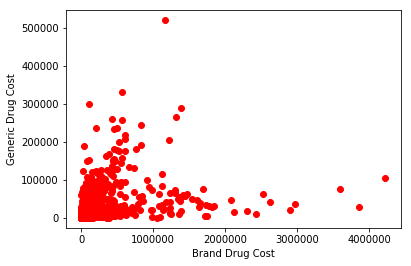

In [41]:
plt.scatter(ps_dd_df["brand_drug_cost"], ps_dd_df["generic_drug_cost"], color = "r")
plt.xlabel("Brand Drug Cost") #scatter plot of ps_dd_df data
plt.ylabel("Generic Drug Cost")
#plt.xlim(-50,200000)
#plt.ylim(-50,200000)

Text(0, 0.5, 'Log Generic Drug Cost')

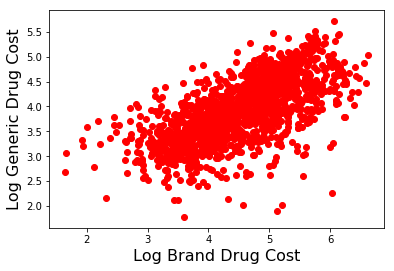

In [42]:
plt.scatter(ps_dd_df["log_brand_cost"], ps_dd_df["log_generic_cost"], color = "r")
plt.xlabel("Log Brand Drug Cost", fontsize = 16) #scatter plot of ps_dd_df data
plt.ylabel("Log Generic Drug Cost", fontsize =16)


Text(0, 0.5, 'Generic Drug Cost')

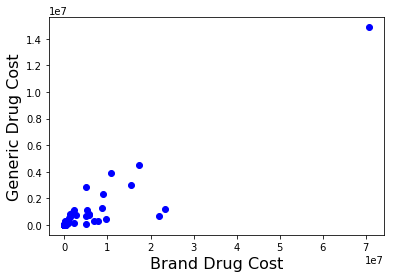

In [43]:
plt.scatter(specialty_df["brand_drug_cost"],specialty_df["generic_drug_cost"], color = "b")
plt.xlabel("Brand Drug Cost", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Generic Drug Cost",  fontsize = 16)

Text(0, 0.5, 'Log Generic Drug Cost')

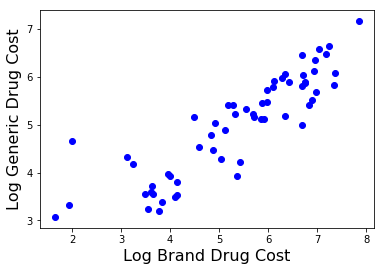

In [44]:
plt.scatter(specialty_df["log_brand_cost"],specialty_df["log_generic_cost"], color = "b")
plt.xlabel("Log Brand Drug Cost", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Log Generic Drug Cost",  fontsize = 16)

In [45]:
specialty_df.sort_values("generic_brand_ratio_cost", inplace =True, na_position = "first") #remove later

In [46]:
specialty_df["generic_brand_ratio_cost"].describe() #add cost to end of ratio

count    60.000000
mean      6.106801
std       9.359200
min       0.002250
25%       1.166946
50%       2.704012
75%       5.575283
max      49.642864
Name: generic_brand_ratio_cost, dtype: float64

Text(0, 0.5, 'Generic-Brand ratio')

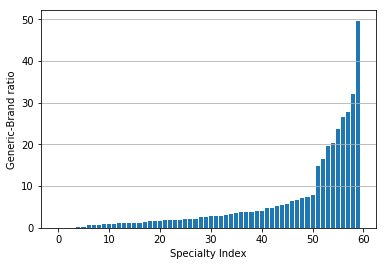

In [47]:
plt.grid(True, "both", "y") #add cost to end of ratio
plt.bar(range(len(specialty_df)),specialty_df["generic_brand_ratio_cost"]) #bar graph of specialty generic to brand ratios
plt.xlabel("Specialty Index")
plt.ylabel("Generic-Brand ratio")

Text(0, 0.5, 'Generic to Brand Cost Ratio')

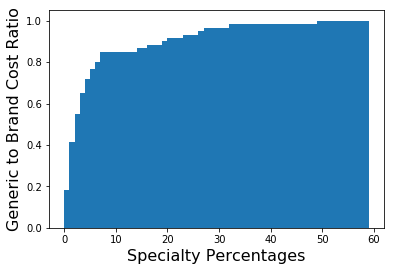

In [48]:
plt.hist(specialty_df["generic_brand_ratio_cost"], bins = range(len(specialty_df)), density =True, cumulative = True) #bar graph of specialty generic to brand ratios
plt.xlabel("Specialty Percentages", fontsize =16)
plt.ylabel("Generic to Brand Cost Ratio", fontsize = 16)

In [112]:
def low_mid_high(generic_brand_ratio_cost): 
    '''Sectioning off Generic Brands ratio cost as low to high'''
    #if generic_brand_ratio_cost
    if generic_brand_ratio_cost <= 10:
        return "0-10"
    elif generic_brand_ratio_cost <= 40:
        return "11-40"
    elif generic_brand_ratio_cost > 40:
        return ">40"

In [113]:
specialtyCountNormalize = specialty_df["generic_brand_ratio_cost"].map(low_mid_high).value_counts(normalize = True, sort = False) #normalized values

In [114]:
specialtyCount = specialty_df["generic_brand_ratio_cost"].map(low_mid_high).value_counts(sort = False)

In [115]:
print(specialtyCount.sort_values())

>40       1
11-40     8
0-10     51
Name: generic_brand_ratio_cost, dtype: int64


Text(0, 0.5, 'Specialty Count')

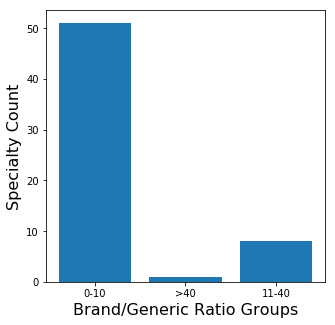

In [116]:
xIndex = specialtyCount.index.values
plt.bar(xIndex, list(specialtyCount))
plt.xlabel("Brand/Generic Ratio Groups", fontsize =16)
plt.ylabel("Specialty Count", fontsize = 16)

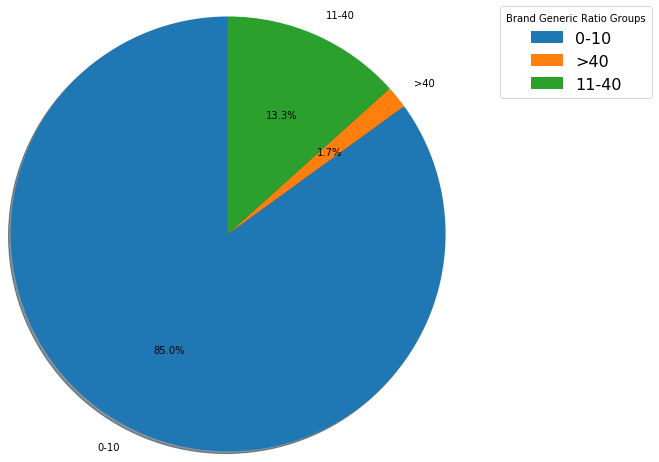

In [133]:
ax = plt.pie(x = list(specialtyCount), labels = xIndex, autopct="%1.1f%%", shadow=True, startangle = 90, radius = 2)
plt.legend(xIndex, title="Brand Generic Ratio Groups", loc = (1.5,1), fontsize =16)

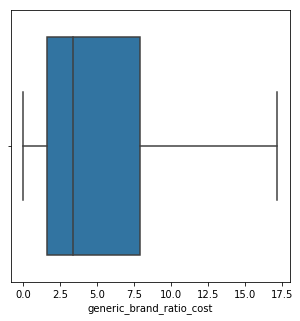

In [98]:
ax = sns.boxplot("generic_brand_ratio_cost", data=ps_dd_df, showfliers=False)


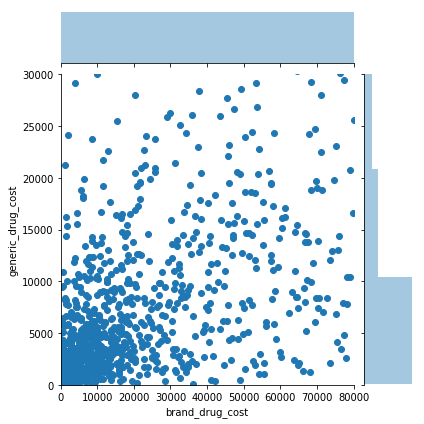

In [99]:
sns.jointplot("brand_drug_cost", "generic_drug_cost", kind = "scatter", data=ps_dd_df, xlim = (0,80000), ylim = (0,30000))

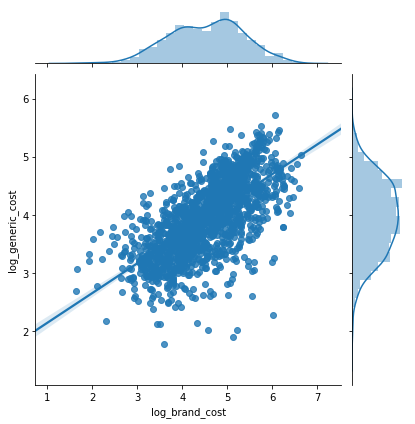

In [96]:
sns.jointplot("log_brand_cost", "log_generic_cost", kind = "reg", data=ps_dd_df)

In [59]:
#ps_dd_df.head(10)

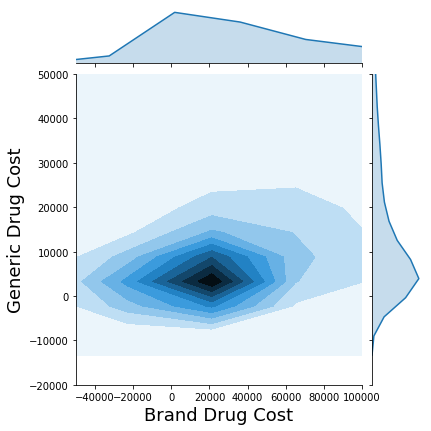

In [64]:
ax = sns.jointplot("brand_drug_cost", "generic_drug_cost", data=ps_dd_df,kind = "kde", xlim = (-50000,100000), ylim = (-20000,50000) )
ax.set_axis_labels(xlabel = "Brand Drug Cost", ylabel = "Generic Drug Cost", fontsize = 18)


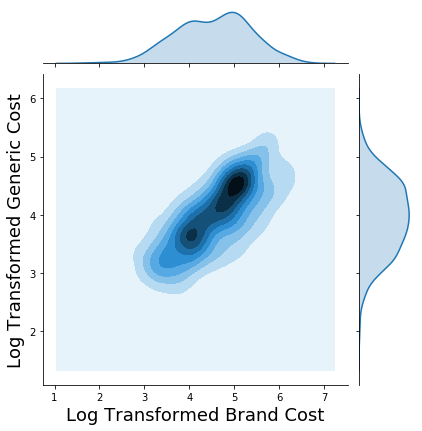

In [60]:
ax = sns.jointplot("log_brand_cost", "log_generic_cost", data=ps_dd_df,kind = "kde" )
ax.set_axis_labels(xlabel = "Log Transformed Brand Cost", ylabel = "Log Transformed Generic Cost", fontsize = 18)


Maybe Change to brand/generic ratio